In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import datetime as dt
import os
import joblib
import seaborn as sns
# customisations - ensure tables show all columns
pd.set_option("max_columns", 100)
pd.options.plotting.backend = "plotly"

In [2]:
#I only had 16 cols in the first app_id scrape, some rows have 18 so need to specify cols to retrieve

In [12]:
columns = ['app_id', 'dlc', 'recommendationid', 'author', 'language', 'review', 
           'timestamp_created', 'timestamp_updated', 'voted_up', 'votes_up', 
           'votes_funny', 'weighted_vote_score', 'comment_count', 'steam_purchase', 
           'received_for_free', 'written_during_early_access']

In [13]:
download_path = 'data/download/review'
csv_list = ['steam_dlc_reviews2.csv', 'steam_dlc_reviews3.csv']
df_list= []
for file in csv_list:
    df= pd.read_csv(os.path.join(download_path, file), usecols = columns)
    df_list.append(df)
    df = pd.concat(df_list)

In [14]:
df.shape

(124605, 16)

In [15]:
df.duplicated().sum()

33962

In [17]:
df.drop_duplicates(keep='first', inplace=True)

In [19]:
df.shape

(90643, 16)

In [21]:
#save concat review df as csv
#df.to_csv('/Users/alison/Desktop/GA/DSI15-lessons/project/project-capstone/Capstone Steam/data/download/full_dlc_review_data.csv')

In [28]:
#save concat review df as joblib
#f = 'data/full_dlc_reviews.joblib'
#joblib.dump(df, f)

['data/full_dlc_reviews.joblib']

In [22]:
df.isnull().sum()
#13803 columns with just the appid - these are dlcs that dont have user reviews

app_id                             0
dlc                                0
recommendationid                   0
author                         13803
language                       13803
review                         13831
timestamp_created              13803
timestamp_updated              13803
voted_up                       13803
votes_up                       13803
votes_funny                    13803
weighted_vote_score            13803
comment_count                  13803
steam_purchase                 13803
received_for_free              13803
written_during_early_access    13803
dtype: int64

In [33]:
df = df[df.author.notnull()]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76840 entries, 0 to 8954
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   app_id                       76840 non-null  int64  
 1   dlc                          76840 non-null  int64  
 2   recommendationid             76840 non-null  object 
 3   author                       76840 non-null  object 
 4   language                     76840 non-null  object 
 5   review                       76812 non-null  object 
 6   timestamp_created            76840 non-null  float64
 7   timestamp_updated            76840 non-null  float64
 8   voted_up                     76840 non-null  object 
 9   votes_up                     76840 non-null  float64
 10  votes_funny                  76840 non-null  float64
 11  weighted_vote_score          76840 non-null  float64
 12  comment_count                76840 non-null  float64
 13  steam_purchase   

In [35]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df[['review_created', 'review_updated']] = df[['timestamp_created', 'timestamp_updated']].\
apply(pd.to_datetime, unit = 's')

In [44]:
df['review_year'] = df['review_created'].dt.year

In [37]:
df.drop(columns = ['timestamp_created', 'timestamp_updated', 'steam_purchase', 'language'], inplace=True)
#drop language as these are all english

In [76]:
df[df.review.isnull()]
#Some people didn't leave text reviews, just a positive or negative rating

,app_id,dlc,recommendationid,author,review,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,received_for_free,written_during_early_access,review_created,review_updated,review_year
750,24082,1,12503703,"{'steamid': '76561198037782583', 'num_games_ow...",NaN,True,4.0,1.0,0.346992,0.0,False,False,2014-10-15 20:30:10,2014-10-15 20:30:10,2014
1038,34345,1,2529501,"{'steamid': '76561198008834383', 'num_games_ow...",NaN,True,21.0,29.0,0.214987,2.0,False,False,2012-11-30 16:04:07,2012-11-30 16:04:07,2012
1051,34348,1,2529502,"{'steamid': '76561198008834383', 'num_games_ow...",NaN,True,15.0,22.0,0.199647,1.0,False,False,2012-11-30 16:03:27,2012-11-30 16:03:27,2012
3277,98421,1,18193784,"{'steamid': '76561198012009381', 'num_games_ow...",NaN,True,1.0,0.0,0.456732,0.0,False,False,2015-09-26 00:13:34,2015-09-26 00:13:34,2015
5093,208740,1,2529514,"{'steamid': '76561198008834383', 'num_games_ow...",NaN,True,1.0,1.0,0.263747,0.0,False,False,2012-11-30 16:05:38,2012-11-30 16:05:38,2012
5109,208741,1,2529515,"{'steamid': '76561198008834383', 'num_games_ow...",NaN,True,5.0,7.0,0.148319,0.0,False,False,2012-11-30 16:05:05,2012-11-30 16:05:05,2012
5117,208742,1,2529516,"{'steamid': '76561198008834383', 'num_games_ow...",NaN,True,6.0,9.0,0.277112,0.0,False,False,2012-11-30 16:04:26,2012-11-30 16:04:26,2012
5352,210895,1,22430458,"{'steamid': '76561198022418529', 'num_games_ow...",NaN,True,0.0,0.0,0.384214,0.0,False,False,2016-04-15 15:35:57,2016-04-15 15:35:57,2016
6248,215534,1,17543338,"{'steamid': '76561198035450826', 'num_games_ow...",NaN,True,0.0,0.0,0.416171,0.0,False,False,2015-08-15 00:32:59,2015-08-15 00:32:59,2015
6261,215535,1,17543333,"{'steamid': '76561198035450826', 'num_games_ow...",NaN,True,1.0,0.0,0.409447,0.0,False,False,2015-08-15 00:32:29,2015-08-15 00:32:29,2015


In [102]:
fig = df['weighted_vote_score'].plot.hist(title='Weighted Helpfulness score')
fig.show()

#weighted_vote_score = helpfulness score

In [89]:
votes_year = df.groupby('review_year')['voted_up'].sum()
votes_year.plot(kind='bar', title='Positive Reviews per Year')

In [90]:
votes_year = df.groupby('review_year')['votes_up'].sum()
votes_year.plot(kind='bar', title='Helpful Reviews per Year')

In [67]:
fig = df['voted_up'].value_counts().plot.bar(title = 'Number of positive reviews', labels=dict(index="Reviews", value="Count", variable="option") )
fig.show()
#Shows a large class imbalance

In [54]:
df['voted_up'].sum()

57731

In [105]:
df = df[df.review.notnull()]

In [107]:
df.reset_index(drop=True, inplace=True)

In [108]:
df.received_for_free.value_counts()

False    75428
True      1384
Name: received_for_free, dtype: int64

In [114]:
#f = 'data/cleanr_dlc_reviews.joblib'
#joblib.dump(df, f)

['data/cleanr_dlc_reviews.joblib']

In [121]:
author_df = pd.json_normalize(dlc_df['author'].apply(eval))

In [122]:
author_df

,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,last_played,playtime_at_review
0,76561197963558222,251,15,0.0,0.0,0.0,NaN
1,76561198044217796,125,8,0.0,0.0,0.0,NaN
2,76561198011647032,11679,502,0.0,0.0,0.0,NaN
3,76561198023430257,489,302,0.0,0.0,0.0,NaN
4,76561197973951600,425,21,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
76807,76561198030898107,242,1,0.0,0.0,0.0,NaN
76808,76561198275276245,9,1,0.0,0.0,0.0,NaN
76809,76561198312901196,23,5,0.0,0.0,0.0,NaN
76810,76561198124711217,9,1,0.0,0.0,0.0,NaN


In [123]:
author_df[author_df.playtime_at_review.notnull()]

,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,last_played,playtime_at_review
54,76561197997602124,799,43,15.0,0.0,8.640000e+04,15.0
57,76561198050382401,121,13,13.0,0.0,1.583473e+09,5.0
59,76561198129668957,33,8,17.0,0.0,1.557945e+09,1.0
60,76561198076704835,33,2,38.0,0.0,1.566631e+09,35.0
67,76561197979953970,623,368,9.0,0.0,1.595957e+09,1.0
...,...,...,...,...,...,...,...
70309,76561198150695251,2280,38,3255.0,3255.0,1.613987e+09,1296.0
70981,76561198253895669,658,14,1.0,0.0,1.608821e+09,1.0
71594,76561198253895669,658,14,1.0,0.0,1.599670e+09,1.0
71819,76561198080396570,4291,44,1.0,0.0,1.608722e+09,1.0


In [124]:
author_df.drop_duplicates(keep='first', inplace=True)

In [125]:
author_df = author_df[author_df.playtime_at_review.isnull()]
#DLCs with playtime -  altho they were labeled as a DLC beforehand, not actually DLCs 187 games mislabeled

In [126]:
author_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51298 entries, 0 to 76811
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   steamid                  51298 non-null  object 
 1   num_games_owned          51298 non-null  int64  
 2   num_reviews              51298 non-null  int64  
 3   playtime_forever         51289 non-null  float64
 4   playtime_last_two_weeks  51289 non-null  float64
 5   last_played              51289 non-null  float64
 6   playtime_at_review       0 non-null      float64
dtypes: float64(4), int64(2), object(1)
memory usage: 3.1+ MB


In [130]:
author_df.drop(columns=['playtime_forever','playtime_last_two_weeks', 'last_played', 'playtime_at_review'], inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



playtime_forever, playtime_last_two_weeks, last_played doesn't count times for dlcs - only looks at the main game

In [131]:
author_df.reset_index(drop=True, inplace=True)

In [132]:
author_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51298 entries, 0 to 51297
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   steamid          51298 non-null  object
 1   num_games_owned  51298 non-null  int64 
 2   num_reviews      51298 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


Text(0.5, 1.08, 'Games owned vs num reviews')

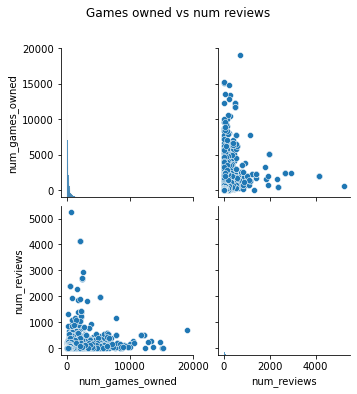

In [136]:
g = sns.pairplot(author_df)
g.fig.suptitle("Games owned vs num reviews", y=1.08)

In [137]:
#f = 'data/authordf.joblib'
#joblib.dump(author_df, f)

['data/authordf.joblib']

In [148]:
#Author column is a dictionary - expanding this out into new columns and concatenate to original df, drop author
dlc_df = pd.concat([df, pd.json_normalize(df['author'].apply(eval))], axis=1)

In [149]:
#f = 'data/expandfull_dlc_reviews.joblib'
#joblib.dump(dlc_df, f)

['data/expandfull_dlc_reviews.joblib']

In [150]:
dlc_df.drop(columns = ['author'], inplace=True)

In [151]:
dlc_df = dlc_df[dlc_df.playtime_at_review.isnull()]

In [152]:
dlc_df.drop(columns=['playtime_forever','playtime_last_two_weeks', 'last_played', 'playtime_at_review'], inplace=True)

In [153]:
dlc_df.head()

,app_id,dlc,recommendationid,review,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,received_for_free,written_during_early_access,review_created,review_updated,review_year,steamid,num_games_owned,num_reviews
0,1256,1,23698284,"I got this back in 2010 and it was around $2, ...",False,51.0,1.0,0.781742,3.0,False,False,2016-06-22 03:34:47,2016-06-22 03:34:47,2016,76561197963558222,251,15
1,1256,1,13871472,DJ Scully nuff said.,True,23.0,4.0,0.707484,0.0,False,False,2015-01-06 22:47:16,2015-01-06 22:47:16,2015,76561198044217796,125,8
2,1256,1,2722792,These Killing Floor characters really adds to ...,True,22.0,2.0,0.659986,0.0,False,False,2011-12-09 03:54:38,2011-12-09 03:54:38,2011,76561198011647032,11679,502
3,1256,1,15154600,Guy in a HaZmat suit... cool\nSome guy with so...,True,7.0,10.0,0.593850,0.0,False,False,2015-04-01 13:25:40,2015-04-01 13:25:40,2015,76561198023430257,489,302
4,1256,1,640873,This DLC has the best looking character models...,True,9.0,0.0,0.591672,0.0,False,False,2010-12-15 01:26:52,2010-12-15 01:26:52,2010,76561197973951600,425,21


In [154]:
dlc_df.written_during_early_access.value_counts() #most games were not free or receievd during early access

False    76610
True        30
Name: written_during_early_access, dtype: int64

In [155]:
dlc_df.received_for_free.value_counts()

False    75256
True      1384
Name: received_for_free, dtype: int64

In [156]:
dlc_df.drop(columns =['comment_count', 'written_during_early_access', 'received_for_free'], inplace=True )

In [157]:
dlc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76640 entries, 0 to 76811
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   app_id               76640 non-null  int64         
 1   dlc                  76640 non-null  int64         
 2   recommendationid     76640 non-null  object        
 3   review               76640 non-null  object        
 4   voted_up             76640 non-null  object        
 5   votes_up             76640 non-null  float64       
 6   votes_funny          76640 non-null  float64       
 7   weighted_vote_score  76640 non-null  float64       
 8   review_created       76640 non-null  datetime64[ns]
 9   review_updated       76640 non-null  datetime64[ns]
 10  review_year          76640 non-null  int64         
 11  steamid              76640 non-null  object        
 12  num_games_owned      76640 non-null  int64         
 13  num_reviews          76640 non-

In [158]:
dlc_df.reset_index(drop=True, inplace=True)

In [165]:
#f = 'data/tidyexpand_dlc_reviews.joblib'
#joblib.dump(dlc_df, f)

['data/tidyexpand_dlc_reviews.joblib']

<b>Feature engineering</b>

In [164]:
dlc_df.weighted_vote_score.value_counts()

0.000000    13055
0.523810     3480
0.545455      872
0.476190      829
0.521739      630
            ...  
0.577917        1
0.701385        1
0.577908        1
0.577902        1
0.405336        1
Name: weighted_vote_score, Length: 42461, dtype: int64

In [166]:
dlc_df.weighted_vote_score.describe()

count    76640.000000
mean         0.441329
std          0.222802
min          0.000000
25%          0.417050
50%          0.511306
75%          0.562214
max          0.977200
Name: weighted_vote_score, dtype: float64

In [162]:
dlc_df.votes_up.value_counts()

0.0      17320
1.0      12483
2.0       8711
3.0       6183
4.0       4835
         ...  
283.0        1
328.0        1
459.0        1
252.0        1
352.0        1
Name: votes_up, Length: 346, dtype: int64

Create positive/helpful classes

In [188]:
def getrating(voted_up):
    """Function returns a rating of positive or negative"""
    if voted_up == 1:
        return 'positive'
    else:
        return 'negative'

In [207]:
def gethelpful(weighted_vote):
    """Function returns whether helpful, neutral or not helpful if weighted review score > 55%"""
    if weighted_vote > 0.51:
        return 'helpful'
    else:
        return 'not-helpful'

In [208]:
dlc_df['rating'] = dlc_df['voted_up'].map(getrating)
dlc_df['helpful'] = dlc_df['weighted_vote_score'].map(gethelpful)

In [209]:
dlc_df.helpful.value_counts(normalize = True) #baseline is 50%? just set this to roughly midway point
#there was bias in the data collection (only collected top100 mot helpful reviews so to adjust for class imbalance)

helpful        0.504776
not-helpful    0.495224
Name: helpful, dtype: float64

In [210]:
dlc_df.rating.value_counts(normalize = True) #very large class imbalance - folk who give reviews tend to rate them positively

positive    0.751187
negative    0.248813
Name: rating, dtype: float64

In [203]:
dlc_df['review_length'] = dlc_df['review'].map(lambda x: len(x))

In [205]:
dlc_df.review_length.value_counts()

4       1099
9        690
8        654
10       568
14       553
        ... 
5604       1
3663       1
1550       1
3535       1
1675       1
Name: review_length, Length: 2880, dtype: int64

In [211]:
#quickly save df
#joblib.dump(dlc_df, 'data/review_eda')

['data/review_eda']

In [206]:
dlc_df.head()

,app_id,dlc,recommendationid,review,voted_up,votes_up,votes_funny,weighted_vote_score,review_created,review_updated,review_year,steamid,num_games_owned,num_reviews,rating,helpful,review_length
0,1256,1,23698284,"I got this back in 2010 and it was around $2, ...",False,51.0,1.0,0.781742,2016-06-22 03:34:47,2016-06-22 03:34:47,2016,76561197963558222,251,15,negative,helpful,175
1,1256,1,13871472,DJ Scully nuff said.,True,23.0,4.0,0.707484,2015-01-06 22:47:16,2015-01-06 22:47:16,2015,76561198044217796,125,8,positive,helpful,20
2,1256,1,2722792,These Killing Floor characters really adds to ...,True,22.0,2.0,0.659986,2011-12-09 03:54:38,2011-12-09 03:54:38,2011,76561198011647032,11679,502,positive,helpful,963
3,1256,1,15154600,Guy in a HaZmat suit... cool\nSome guy with so...,True,7.0,10.0,0.593850,2015-04-01 13:25:40,2015-04-01 13:25:40,2015,76561198023430257,489,302,positive,helpful,176
4,1256,1,640873,This DLC has the best looking character models...,True,9.0,0.0,0.591672,2010-12-15 01:26:52,2010-12-15 01:26:52,2010,76561197973951600,425,21,positive,helpful,62


In [ ]:
#dlc_df = dlc_df.to_csv('/Users/alison/Desktop/GA/DSI15-lessons/project/project-capstone/Capstone Steam/data/download/clean_dlc_reviews.csv', 
                     encoding= 'utf-8')

In [ ]:
in game df the detailed description is an expanded about - so can drop this after checking for nans
maybe also look into just using the short description

In [ ]:
Can do this but then need to scrape review data for original game
as you cannot calculate dlc playtime, had to link up the original game playtime and get the total time played for the game
however might then not have any relationship to the dlc? can use eda to explore this - eg does playtime of a game go up with increase in dlcs?